<a href="https://colab.research.google.com/github/andremarinho17/data_analytics_projects_en/blob/main/TikTok_Project_Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TikTok Project: Regression Analysis**


<p align="center"><img src="https://logodownload.org/wp-content/uploads/2019/08/tiktok-logo-9.png" height="150px">


**Course 5 - Regression Analysis: Simplify complex data relationships**

Author: André Marinho

In [ ]:
import numpy as np
import pandas as pd
import platform
import statsmodels
print('Python version: ', platform.python_version())
print('numpy version: ', np.__version__)
print('pandas version: ', pd.__version__)
print('statsmodels version: ', statsmodels.__version__)

Python version:  3.11.4
numpy version:  1.24.4
pandas version:  2.0.3
statsmodels version:  0.14.0


You are a data professional at TikTok. The data team is working towards building a machine learning model that can be used to determine whether a video contains a claim or whether it offers an opinion. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

The team is getting closer to completing the project, having completed an initial plan of action, initial Python coding work, EDA, and hypothesis testing.

The TikTok team has reviewed the results of the hypothesis testing. TikTok’s Operations Lead, Maika Abadi, is interested in how different variables are associated with whether a user is verified. Earlier, the data team observed that if a user is verified, they are much more likely to post opinions. Now, the data team has decided to explore how to predict verified status to help them understand how video characteristics relate to verified users. Therefore, you have been asked to conduct a logistic regression using verified status as the outcome variable. The results may be used to inform the final model related to predicting whether a video is a claim vs an opinion.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# **Course 5 End-of-course project: Regression modeling**


In this activity, you will build a logistic regression model in Python. As you have learned, logistic regression helps you estimate the probability of an outcome. For data science professionals, this is a useful skill because it allows you to consider more than one variable against the variable you're measuring against. This opens the door for much more thorough and flexible analysis to be completed.

<br/>

**The purpose** of this project is to demostrate knowledge of EDA and regression models.

**The goal** is to build a logistic regression model and evaluate the model.
<br/>
*This activity has three parts:*

**Part 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a logistic regression model?

**Part 2:** Model Building and Evaluation
* What resources do you find yourself using as you complete this stage?

**Part 3:** Interpreting Model Results

* What key insights emerged from your model(s)?

* What business recommendations do you propose based on the models built?

Follow the instructions and answer the question below to complete the activity. Then, you will complete an executive summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.


# **Build a regression model**

# **PACE stages**

Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.



## **PACE: Plan**
Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

### **Task 1. Imports and loading**
Import the data and packages that you've learned are needed for building regression models.

In [ ]:
# Import packages for data manipulation
import math
import numpy as np
import pandas as pd

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for data preprocessing and data modeling
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV

Load the TikTok dataset.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [ ]:
# Load dataset into dataframe
df = pd.read_csv("tiktok_dataset.csv")


## **PACE: Analyze**

Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

In this stage, consider the following question where applicable to complete your code response:

* What are some purposes of EDA before constructing a logistic regression model?


Conducting EDA before constructing a logistic regression models allows us to make the data prepared and structured to run the model effectively.

### **Task 2a. Explore data with EDA**

Analyze the data and check for and handle missing values and duplicates.

Inspect the first five rows of the dataframe.

In [ ]:
# Display first few rows
df.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Get the number of rows and columns in the dataset.

In [ ]:
# Get number of rows and columns
df.shape

(19382, 12)

Get the data types of the columns.

In [ ]:
# Get data types of columns
df.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

Get basic information about the dataset.

In [ ]:
# Get basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Generate basic descriptive statistics about the dataset.

In [ ]:
# Generate basic descriptive stats
df.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


Check for and handle missing values.

In [ ]:
# Check for missing values
df.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [ ]:
# Drop rows with missing values
df = df.dropna(axis=0)

In [ ]:
# Display first few rows after handling missing values
df.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Check for and handle duplicates.

In [ ]:
# Check for duplicates
df.duplicated().sum()

0

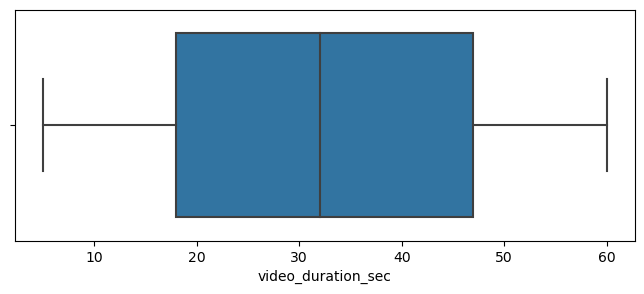

In [ ]:
# Create a boxplot to visualize distribution of `video_duration_sec`
plt.figure(figsize=(8,3))
sns.boxplot(x=df['video_duration_sec'])
plt.show()

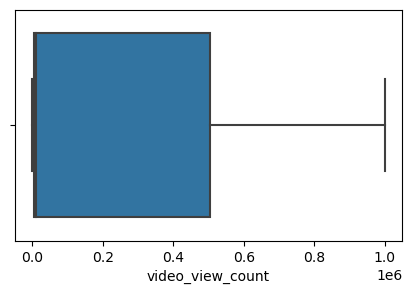

In [ ]:
# Create a boxplot to visualize distribution of `video_view_count`
plt.figure(figsize=(5,3))
sns.boxplot(x=df['video_view_count'])
plt.show()

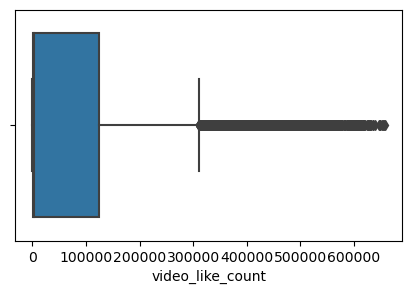

In [ ]:
# Create a boxplot to visualize distribution of `video_like_count`
plt.figure(figsize=(5,3))
sns.boxplot(x=df['video_like_count'])
plt.show()

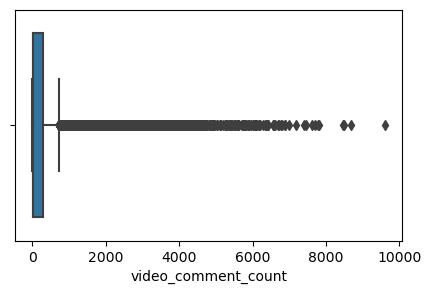

In [ ]:
# Create a boxplot to visualize distribution of `video_comment_count`
plt.figure(figsize=(5,3))
sns.boxplot(x=df['video_comment_count'])
plt.show()

As can be noted, there are outliers present in the `video_like_count` and the `video_comment_count` variables. They will be handled in the next steps.

In [ ]:
# Check for and handle outliers for video_like_count
q1_vlc = df.video_like_count.quantile(.25)
q3_vlc = df.video_like_count.quantile(.75)
IQR_vlc = q3_vlc - q1_vlc
print('Video like count IQR: ', IQR_vlc)

# definindo os limites
upper_vlc = q3_vlc + 1.5 * IQR_vlc
lower_vlc = q1_vlc - 1.5 * IQR_vlc

print('Upper limit: ', upper_vlc)
print('Lower limit: ', lower_vlc)

# Check for and handle outliers for video_comment_count
q1_vcc = df.video_comment_count.quantile(.25)
q3_vcc = df.video_comment_count.quantile(.75)
IQR_vcc = q3_vcc - q1_vcc
print('Video comment count IQR: ', IQR_vcc)

# definindo os limites
upper_vcc = q3_vcc + 1.5 * IQR_vcc
lower_vcc = q1_vcc - 1.5 * IQR_vcc

print('Upper limit: ', upper_vcc)
print('Lower limit: ', lower_vcc)

Video like count IQR:  124209.25
Upper limit:  311333.875
Lower limit:  -185503.125
Video comment count IQR:  291.0
Upper limit:  728.5
Lower limit:  -435.5


In [ ]:
df.drop(df[df.video_like_count > upper_vlc].index, axis=0, inplace=True)
df.drop(df[df.video_comment_count > upper_vcc].index, axis=0, inplace=True)

df.shape

(15694, 12)

Check class balance of the target variable. Remember, the goal is to predict whether the user of a given post is verified or unverified.

In [ ]:
# Check class balance
df['verified_status'].value_counts() / df.shape[0] * 100

verified_status
not verified    92.825284
verified         7.174716
Name: count, dtype: float64

Approximately 94.2% of the dataset represents videos posted by unverified accounts and 5.8% represents videos posted by verified accounts, so the outcome variable is not very balanced.

Use resampling to create class balance in the outcome variable, if needed.

In [ ]:
# Use resampling to create class balance in the outcome variable, if needed

# Identify data points from majority and minority classes
minority = df[df['verified_status'] == "verified"]
majority = df[df['verified_status'] == "not verified"]

# Upsample the minority class (which is "verified")
minority_upsampled = resample(minority, replace = True, n_samples=len(majority), random_state=0)

# Combine majority class with upsampled minority class
df_balanced = pd.concat([majority, minority_upsampled]).reset_index(drop=True)

# Display new class counts
df_balanced['verified_status'].value_counts() / df_balanced.shape[0] * 100

verified_status
not verified    50.0
verified        50.0
Name: count, dtype: float64

In [ ]:
df_balanced['verified_status'].value_counts()

verified_status
not verified    14568
verified        14568
Name: count, dtype: int64

Now, the data is perfectly balanced.

Get the average `video_transcription_text` length for videos posted by verified accounts and the average `video_transcription_text` length for videos posted by unverified accounts.



In [ ]:
df_balanced.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [ ]:
# Get the average `video_transcription_text` length for claims and the average `video_transcription_text` length for opinions
df_balanced[["verified_status", "video_transcription_text"]].groupby(by="verified_status")[["video_transcription_text"]].agg(func=lambda array: np.mean([len(text) for text in array]))

,video_transcription_text
verified_status,
not verified,88.118342
verified,83.715404


Extract the length of each `video_transcription_text` and add this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [ ]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
df_balanced["transcription_length"] = df_balanced["video_transcription_text"].apply(func=lambda text: len(text))

In [ ]:
# Display first few rows of dataframe after adding new column
df_balanced.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,transcription_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts.

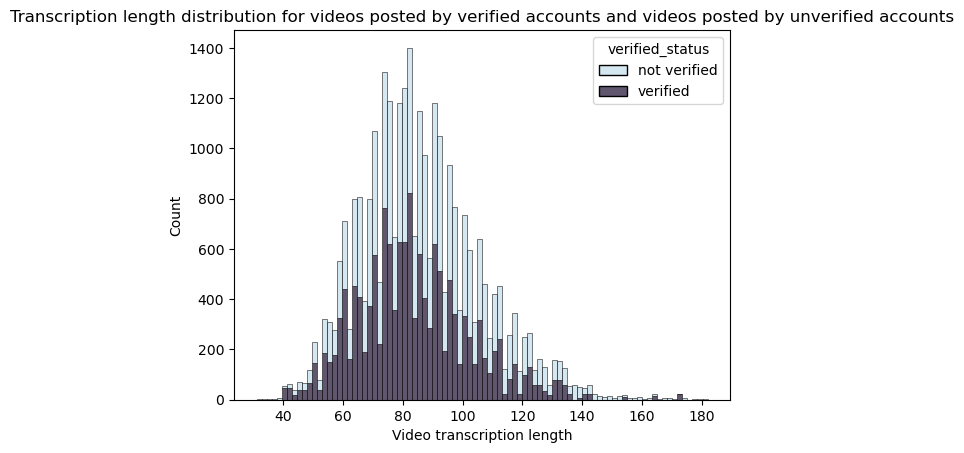

In [ ]:
# Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts
# Create two histograms in one plot
sns.histplot(data=df_balanced, stat="count", multiple="stack", x="transcription_length", kde=False,
             palette="ch:s=.25,rot=-.25", hue="verified_status", element="bars", legend=True)

plt.xlabel("Video transcription length")
plt.ylabel("Count")
plt.title("Transcription length distribution for videos posted by verified accounts and videos posted by unverified accounts")
plt.show()

The histogram shows that both groups exhibit a similar pattern, with transcription lengths predominantly ranging between 60 and 100 words, peaking around 80 words. Verified accounts tend to have slightly fewer videos with longer transcription lengths compared to unverified accounts, as seen in the diminishing tails of the distribution. This suggests that while both verified and unverified users adhere to comparable content transcription practices, verified accounts might lean toward more concise or standardized video descriptions.

### **Task 2b. Examine correlations**

Next, code a correlation matrix to help determine most correlated variables.

In [ ]:
# Code a correlation matrix to help determine most correlated variables
df_balanced.corr(numeric_only=True)

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,transcription_length
#,1.000000,0.000510,-0.014651,-0.652918,-0.579387,-0.494681,-0.502852,-0.552135,-0.171038
video_id,0.000510,1.000000,0.012614,0.001845,-0.001581,-0.003811,-0.004251,-0.005672,-0.001773
video_duration_sec,-0.014651,0.012614,1.000000,0.007014,0.002066,0.014504,0.008033,-0.006547,-0.012682
video_view_count,-0.652918,0.001845,0.007014,1.000000,0.767183,0.658922,0.635805,0.625267,0.228593
video_like_count,-0.579387,-0.001581,0.002066,0.767183,1.000000,0.857647,0.772664,0.682803,0.197698
video_share_count,-0.494681,-0.003811,0.014504,0.658922,0.857647,1.000000,0.639001,0.584335,0.167956
video_download_count,-0.502852,-0.004251,0.008033,0.635805,0.772664,0.639001,1.000000,0.729825,0.175910
video_comment_count,-0.552135,-0.005672,-0.006547,0.625267,0.682803,0.584335,0.729825,1.000000,0.197066
transcription_length,-0.171038,-0.001773,-0.012682,0.228593,0.197698,0.167956,0.175910,0.197066,1.000000


Visualize a correlation heatmap of the data.

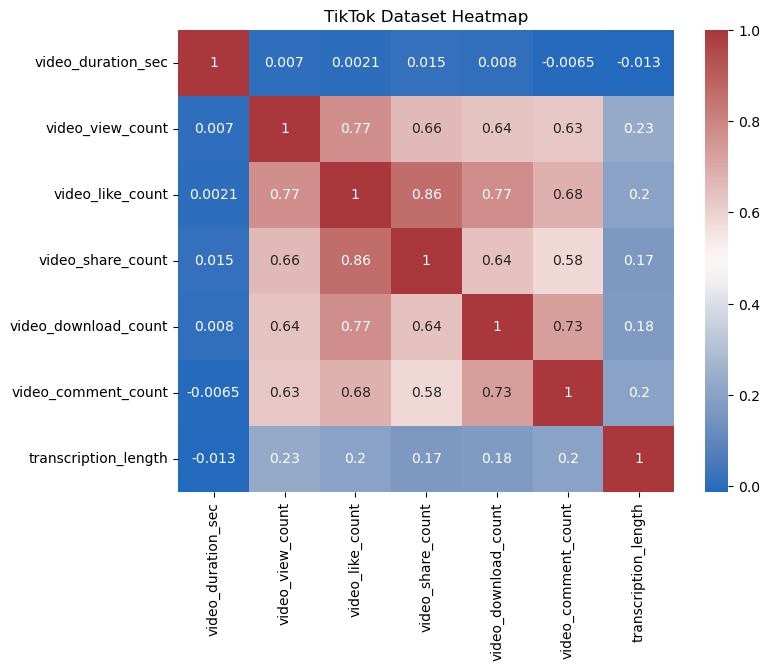

In [ ]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(8, 6))
sns.heatmap(
    df_balanced[["video_duration_sec", "claim_status", "author_ban_status", "video_view_count", "video_like_count",
                 "video_share_count", "video_download_count", "video_comment_count", "transcription_length"]]
    .corr(numeric_only=True),
    annot=True,
    cmap="vlag")
plt.title("TikTok Dataset Heatmap")
plt.show()

One of the model assumptions for logistic regression is no severe multicollinearity among the features. Take this into consideration as you examine the heatmap and choose which features to proceed with.

**Question:** What variables are shown to be correlated in the heatmap?

As can be seen, the `video_like_count` variable is strongly correlated with `video_share_count` (83%), as well as with `video_view_count` (78%) and `video_download_count` (76%). With that said, the `video_like_count` will be removed and the other ones (`video_share_count`, `video_view_count`, `video_download_count`, and `video_comment_count`) will be kept as features.

## **PACE: Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model. Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3a. Select variables**

Set your Y and X variables.

Select the outcome variable.

In [ ]:
# Select outcome variable
y = df_balanced['verified_status']

Select the features.

In [ ]:
# Select features
X = df_balanced[["video_duration_sec", "claim_status", "author_ban_status", "video_view_count", "video_share_count", "video_download_count", "video_comment_count"]]

# Display the first few rows of features dataframe
X.head()

,video_duration_sec,claim_status,author_ban_status,video_view_count,video_share_count,video_download_count,video_comment_count
0,59,claim,under review,343296.0,241.0,1.0,0.0
1,32,claim,active,140877.0,19034.0,1161.0,684.0
2,31,claim,active,902185.0,2858.0,833.0,329.0
3,25,claim,active,437506.0,34812.0,1234.0,584.0
4,19,claim,active,56167.0,4110.0,547.0,152.0


### **Task 3b. Train-test split**

Split the data into training and testing sets.

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

Confirm that the dimensions of the training and testing sets are in alignment.

In [ ]:
# Get shape of each training and testing set
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21852, 7), (7284, 7), (21852,), (7284,))

### **Task 3c. Encode variables**

Check the data types of the features.

In [ ]:
# Check data types
X_train.dtypes

video_duration_sec        int64
claim_status             object
author_ban_status        object
video_view_count        float64
video_share_count       float64
video_download_count    float64
video_comment_count     float64
dtype: object

In [ ]:
# Get unique values in `claim_status`
X_train['claim_status'].unique()

array(['opinion', 'claim'], dtype=object)

In [ ]:
# Get unique values in `author_ban_status`
X_train['author_ban_status'].unique()

array(['active', 'under review', 'banned'], dtype=object)

As shown above, the `claim_status` and `author_ban_status` features are each of the data type `object` currently. In order to work with the implementations of models through `sklearn`, these categorical features will need to be made numeric. One way to do this is through one-hot encoding.

Encode categorical features in the training set using an appropriate method.

In [ ]:
# Select the training features that needs to be encoded
encoded_candidates = X_train[['claim_status', 'author_ban_status']]

# Display first few rows
encoded_candidates.head()

,claim_status,author_ban_status
15967,opinion,active
20556,opinion,active
25263,opinion,active
5063,claim,active
24237,opinion,active


In [ ]:
# Set up an encoder for one-hot encoding the categorical features
X_encoder = OneHotEncoder(drop='first', sparse_output=False)

In [ ]:
# Fit and transform the training features using the encoder
encoded_variables = X_encoder.fit_transform(encoded_candidates)

In [ ]:
# Get feature names from encoder
X_encoder.get_feature_names_out()

array(['claim_status_opinion', 'author_ban_status_banned',
       'author_ban_status_under review'], dtype=object)

In [ ]:
# Display first few rows of encoded training features
encoded_variables

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 0.]])

In [ ]:
# Place encoded training features (which is currently an array) into a dataframe
X_train_encoded = pd.DataFrame(data=encoded_variables, columns=X_encoder.get_feature_names_out())

# Display first few rows
X_train_encoded.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,0.0
4,1.0,0.0,0.0


In [ ]:
# Display first few rows of `X_train` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
X_train.drop(columns=['claim_status', 'author_ban_status']).head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count
15967,49,172.0,3.0,1.0,0.0
20556,12,6531.0,55.0,14.0,1.0
25263,49,3947.0,70.0,10.0,1.0
5063,13,729474.0,55866.0,1031.0,680.0
24237,48,5425.0,131.0,9.0,1.0


In [ ]:
# Concatenate `X_train` and `X_train_encoded_df` to form the final dataframe for training data (`X_train_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_train after dropping `claim_status` and `author_ban_status`,
# so that the indices align with those in `X_train_encoded_df` and `count_df`
X_train_final = pd.concat([X_train.drop(columns=['claim_status', 'author_ban_status']).reset_index(drop=True), X_train_encoded], axis = 1)

# Display first few rows
X_train_final.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,49,172.0,3.0,1.0,0.0,1.0,0.0,0.0
1,12,6531.0,55.0,14.0,1.0,1.0,0.0,0.0
2,49,3947.0,70.0,10.0,1.0,1.0,0.0,0.0
3,13,729474.0,55866.0,1031.0,680.0,0.0,0.0,0.0
4,48,5425.0,131.0,9.0,1.0,1.0,0.0,0.0


Check the data type of the outcome variable.

In [ ]:
# Check data type of outcome variable
y_train.dtypes

dtype('O')

In [ ]:
# Get unique values of outcome variable
y_train.unique()

array(['verified', 'not verified'], dtype=object)

A shown above, the outcome variable is of data type `object` currently. One-hot encoding can be used to make this variable numeric.

Encode categorical values of the outcome variable the training set using an appropriate method.

In [ ]:
# Set up an encoder for one-hot encoding the categorical outcome variable
y_encoder = OneHotEncoder(drop='first', sparse_output=False)

In [ ]:
# Encode the training outcome variable
# Notes:
#   - Adjusting the shape of `y_train` before passing into `.fit_transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.fit_transform()`, so that it can be used later to train the model
y_train_final = y_encoder.fit_transform(y_train.values.reshape(-1,1)).ravel()

# Display the encoded training outcome variable
y_train_final

array([1., 1., 1., ..., 0., 0., 0.])

Now that the categorical variables of the training data are encoded, the model can be built.

### **Task 3d. Model building**

Construct a model and fit it to the training set.

In [ ]:
# Construct a logistic regression model and fit it to the training set
log_clf = LogisticRegression(random_state=0, max_iter=800).fit(X_train_final, y_train_final)


## **PACE: Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Taks 4a. Results and evaluation**

Evaluate your model.

Encode categorical features in the testing set using an appropriate method.

In [ ]:
# Select the testing features that needs to be encoded
test_encoded_candidates = X_test[['claim_status', 'author_ban_status']]


# Display first few rows
test_encoded_candidates.head()

,claim_status,author_ban_status
1533,claim,active
12691,opinion,active
2164,claim,active
4129,claim,active
4615,claim,active


In [ ]:
# Transform the testing features using the encoder
test_encoded = X_encoder.transform(test_encoded_candidates)

# Display first few rows of encoded testing features
test_encoded

array([[0., 0., 0.],
       [1., 0., 0.],
       [0., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 0.],
       [0., 1., 0.]])

In [ ]:
# Place encoded testing features (which is currently an array) into a dataframe
X_test_encoded = pd.DataFrame(data=test_encoded, columns=X_encoder.get_feature_names_out())

# Display first few rows
X_test_encoded.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,0.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0


In [ ]:
# Display first few rows of `X_test` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
X_test.drop(columns=["claim_status", "author_ban_status"]).head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count
1533,29,264227.0,10191.0,495.0,12.0
12691,45,7980.0,130.0,26.0,4.0
2164,59,75840.0,2154.0,31.0,17.0
4129,10,257846.0,27457.0,266.0,154.0
4615,49,949207.0,21274.0,1342.0,124.0


In [ ]:
# Concatenate `X_test` and `X_test_encoded_df` to form the final dataframe for training data (`X_test_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_test after dropping `claim_status`, and `author_ban_status`,
# so that the indices align with those in `X_test_encoded_df` and `test_count_df`
X_test_final = pd.concat([X_test.drop(columns=["claim_status", "author_ban_status"]).reset_index(drop=True), X_test_encoded], axis=1)


# Display first few rows
X_test_final.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,29,264227.0,10191.0,495.0,12.0,0.0,0.0,0.0
1,45,7980.0,130.0,26.0,4.0,1.0,0.0,0.0
2,59,75840.0,2154.0,31.0,17.0,0.0,0.0,0.0
3,10,257846.0,27457.0,266.0,154.0,0.0,0.0,0.0
4,49,949207.0,21274.0,1342.0,124.0,0.0,0.0,0.0


Test the logistic regression model. Use the model to make predictions on the encoded testing set.

In [ ]:
# Use the logistic regression model to get predictions on the encoded testing set
y_pred = log_clf.predict(X_test_final)

Display the predictions on the encoded testing set.

In [ ]:
# Display the predictions on the encoded testing set
y_pred

array([0., 1., 1., ..., 1., 0., 0.])

Display the true labels of the testing set.

In [ ]:
# Display the true labels of the testing set
y_test

1533     not verified
12691    not verified
2164     not verified
4129     not verified
4615     not verified
             ...     
8789     not verified
10113    not verified
6204     not verified
121      not verified
2092     not verified
Name: verified_status, Length: 7284, dtype: object

Encode the true labels of the testing set so it can be compared to the predictions.

In [ ]:
# Encode the testing outcome variable
# Notes:
#   - Adjusting the shape of `y_test` before passing into `.transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.transform()`, so that it can be used later to compare with predictions
### YOUR CODE HERE ###
y_test_final = y_encoder.transform(y_test.values.reshape(-1,1)).ravel()

# Display the encoded testing outcome variable
y_test_final

array([0., 0., 0., ..., 0., 0., 0.])

Confirm again that the dimensions of the training and testing sets are in alignment since additional features were added.

In [ ]:
# Get shape of each training and testing set
X_train_final.shape, y_train_final.shape, X_test_final.shape, y_test_final.shape

((21852, 8), (21852,), (7284, 8), (7284,))

It's notable that the number of rows and features aligns between the training and test sets.

### **Task 4b. Visualize model results**

Create a confusion matrix to visualize the results of the logistic regression model.

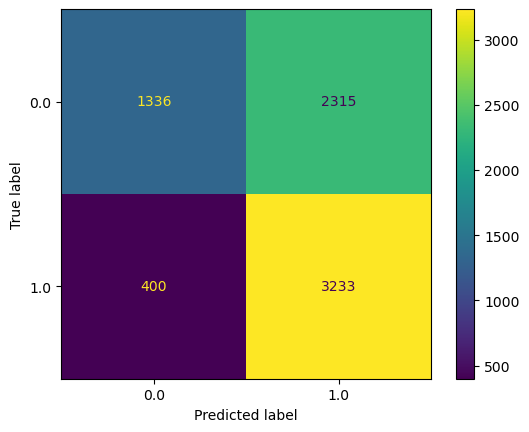

In [ ]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test_final, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.show()

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model.

In [ ]:
# Create a classification report
target_labels = ["verified", "not verified"]
print(classification_report(y_test_final, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

    verified       0.77      0.37      0.50      3651
not verified       0.58      0.89      0.70      3633

    accuracy                           0.63      7284
   macro avg       0.68      0.63      0.60      7284
weighted avg       0.68      0.63      0.60      7284



The classification report shows that the model performs well in identifying "not verified" users, which is the target class, with a high recall of 89%, meaning it successfully detects most of the actual "not verified" videos. However, its precision is lower at 58%, indicating a significant number of verified videos are incorrectly classified as "not verified." The F1-score of 0.70 reflects a decent balance between precision and recall.

### **Task 4c. Interpret model coefficients**

In [ ]:
# Get the feature names from the model and the model coefficients (which represent log-odds ratios)
# Place into a DataFrame for readability
pd.DataFrame(data={"Feature Name":log_clf.feature_names_in_, "Model Coefficient":log_clf.coef_[0]})

,Feature Name,Model Coefficient
0,video_duration_sec,5.958657e-03
1,video_view_count,-2.298147e-06
2,video_share_count,5.335541e-07
3,video_download_count,-2.234889e-04
4,video_comment_count,2.663169e-04
5,claim_status_opinion,2.854965e-04
6,author_ban_status_banned,-1.250666e-05
7,author_ban_status_under review,-4.896539e-06


According to the model coefficients, each additional second, comment, and share of video is associated with a slight increase in the log-odds of the user having a verified status.

### **Task 4d. Conclusion**

What results can be presented from this project?

The analysis of the model designed to predict whether a TikTok video originates from a verified user reveals compelling strengths, particularly in identifying unverified users. The model achieved an impressive recall of 89% for unverified users, indicating that it correctly identifies the majority of unverified content. This high performance is further supported by a precision of 58%, suggesting that when the model predicts a video is from an unverified user, it is accurate nearly 60% of the time. Overall, the F1-score for unverified users stands at 70%, reflecting a solid balance between precision and recall, which is crucial for effectively filtering non-verified content.

In addition to these results, it was found that each additional second of video duration, as well as every comment and share, is associated with a slight increase in the log-odds of the user having a verified status. This insight underscores the importance of engagement metrics in predicting user verification, suggesting that more interactive and longer videos are likely to come from verified users. By integrating this information into the strategy, the company can further enhance the model's accuracy and reliability. As the approach is refined, TikTok will continue to leverage these strengths in unverified user detection while also considering engagement metrics to improve the overall effectiveness of our verification process, ensuring that the model remains a valuable asset in maintaining the integrity of the platform.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.